# Regression 1

## Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm

## Functions

In [3]:
def g(x):
    return 4.26 * (np.exp(-x) - 4 * np.exp(-2*x) + 3 * np.exp(-3*x))

def generate_data(num_samples, sigma=0.1):
    x = np.random.uniform(0, 4, num_samples)
    epsilon = np.random.normal(0, sigma, num_samples)
    y = g(x) + epsilon
    tmp = x.argsort()
    x = x[tmp]
    y = y[tmp]
    return x, y

# Function to compute MSE
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

## Tasks

### 2 & 3

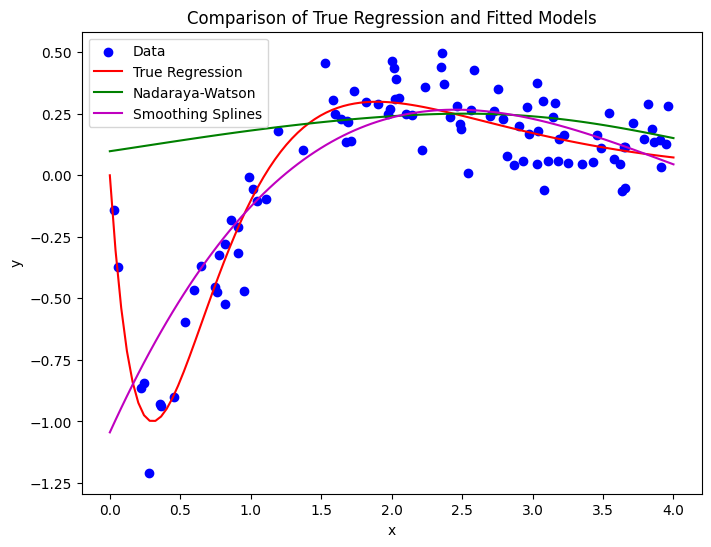

In [86]:
# Generate data using the previous task's generate_data function
num_samples = 100
x, y = generate_data(num_samples)

# Nadaraya-Watson kernel regression
# kde = KernelDensity(kernel='gaussian', bandwidth=0.2)
kde = KernelDensity()
kde.fit(x[:, np.newaxis])
x_grid = np.linspace(0, 4, 100)
y_kde = np.exp(kde.score_samples(x_grid[:, np.newaxis]))

# Smoothing Splines
spline = UnivariateSpline(x, y)
y_spline = spline(x_grid)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='b', label='Data')
plt.plot(x_grid, g(x_grid), 'r', label='True Regression')
plt.plot(x_grid, y_kde, 'g', label='Nadaraya-Watson')
plt.plot(x_grid, y_spline, 'm', label='Smoothing Splines')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of True Regression and Fitted Models')
plt.legend()
plt.show()

### 4

In [88]:
mse_kde = compute_mse(g(x), y_kde)
mse_spline = compute_mse(g(x), y_spline)

print("MSE for Nadaraya-Watson kernel regression:", mse_kde)
print("MSE for Smoothing Splines:", mse_spline)

MSE for Nadaraya-Watson kernel regression: 0.12043369492974515
MSE for Smoothing Splines: 0.026934106540779906


### 5

In [75]:
# Parameters
sample_sizes = [i for i in range(100, 1000, 10)]
sigmas = [i/100 for i in range(5, 100, 5)]

results = []
for sample_size in tqdm(sample_sizes, position=0):
    for sigma in tqdm(sigmas, position=1, leave=False):
        x, y = generate_data(sample_size, sigma)
        
        # Nadaraya-Watson kernel regression
        kde = KernelDensity()
        kde.fit(x[:, np.newaxis])
        x_grid = np.linspace(0, 4, 1000)
        y_kde = np.exp(kde.score_samples(x_grid[:, np.newaxis]))
        mse_kde = compute_mse(g(x_grid), y_kde)

        # Smoothing Splines
        spline = UnivariateSpline(x, y)
        y_spline = spline(x_grid)
        mse_spline = compute_mse(g(x_grid), y_spline)

        results.append((sample_size, sigma, mse_kde, mse_spline))

results = pd.DataFrame(results, columns=["sample_size", "sigma", "mse_kde", "mse_spline"])

100%|██████████| 90/90 [00:59<00:00,  1.51it/s]


In [79]:
# results["mse_kde"] = (results[["mse_kde"]] - results[["mse_kde"]].min()) / (results[["mse_kde"]].max() - results[["mse_kde"]].min())
mean = results[["mse_kde"]].mean()
std = results[["mse_kde"]].std()

kde_min = mean[0] - 3*std[0]
kde_max = mean[0] + 3*std[0]

In [80]:
# results["mse_spline"] = (results[["mse_spline"]] - results[["mse_spline"]].min()) / (results[["mse_spline"]].max() - results[["mse_spline"]].min())
mean = results[["mse_spline"]].mean()
std = results[["mse_spline"]].std()

spline_min = mean[0] - 3*std[0]
spline_max = mean[0] + 3*std[0]

/tmp/ipykernel_2495/3337401924.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  res_kde = results.pivot("sample_size", "sigma", "mse_kde")
/tmp/ipykernel_2495/3337401924.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  res_spline = results.pivot("sample_size", "sigma", "mse_spline")


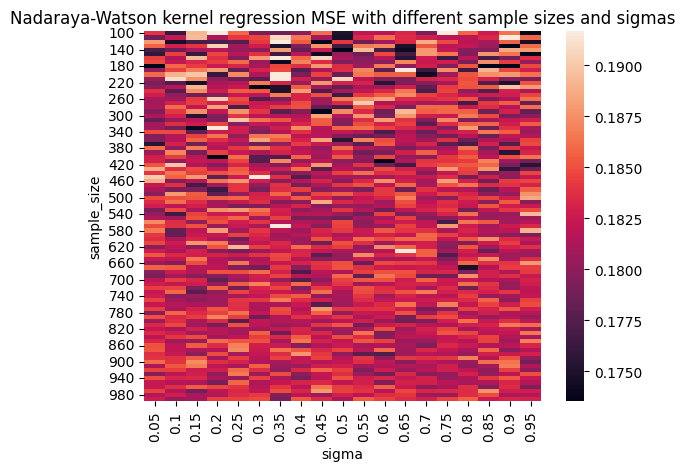

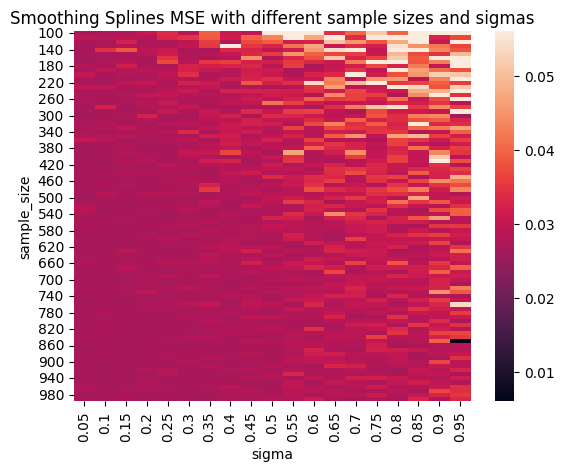

In [89]:
res_kde = results.pivot("sample_size", "sigma", "mse_kde")
res_spline = results.pivot("sample_size", "sigma", "mse_spline")

sns.heatmap(data=res_kde, vmin=kde_min, vmax=kde_max)
plt.title("Nadaraya-Watson kernel regression MSE with different sample sizes and sigmas")
plt.show()

plt.title("Smoothing Splines MSE with different sample sizes and sigmas")
sns.heatmap(data=res_spline, vmin=spline_min, vmax=spline_max)
plt.show()